<a href="https://colab.research.google.com/github/rz74/RF-Stage-Link-Calculator/blob/main/RF_Chain_Gain_Calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialization

In [ ]:
# DO NOT CHANGE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
####----####----####----####----####----####----####----USER_INPUT----####----####----####----####----####----####----####
# change the path to where the data is stored

#%cd /content/drive/MyDrive/rf cal/data

#%cd /content/drive/MyDrive/Colab Notebooks/data

# %cd /content/sample_data

%cd /content/drive/MyDrive/Colab Notebooks/data

####----####----####----####----####----####----####----END__INPUT----####----####----####----####----####----####----####

/content/drive/MyDrive/Colab Notebooks/data


In [ ]:

pip install scikit-rf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 18.3 MB/s eta 0:00:00


In [ ]:
# DO NOT CHANGE
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import skrf as rf
import re
import math

In [ ]:
####----####----####----####----####----####----####----USER_INPUT----####----####----####----####----####----####----####

# Define the freq range of this system in GHz
# And number of freq points
freq_l = 1
freq_h = 40
step_size = 0.5
####----####----####----####----####----####----####----END__INPUT----####----####----####----####----####----####----####


# DO NOT CHANGE
freq_num = int((freq_h - freq_l) / step_size) + 1
f = np.linspace(freq_l,freq_h,freq_num)
f_df = pd.DataFrame(f, columns=['Frequency'])

# Functions

In [ ]:
####----####----####----####----####----####----####----USER_INPUT----####----####----####----####----####----####----####



####----####----####----####----####----####----####----END__INPUT----####----####----####----####----####----####----####

In [ ]:
# DO NOT CHANGE
# input: the ntwk object and freq range and number of points
# output: a panda data frame with gain in db form

def ntwk_to_db(input_ntwk):


  # data cleaning
  # convert a ntwk to it's gain in db
  # bt/w lf and hf (in GHz)

  # define freq range and interpolate missing points

  f = np.linspace(freq_l,freq_h,freq_num)
  freq = rf.Frequency.from_f(f, unit='GHz')
  input_ntwk.interpolate_self(freq)
  output_ntwk = input_ntwk['1-40ghz']

  # pull s21 from ntwk
  output_s21 = output_ntwk.s21
  output_db = output_s21.s_db

  # convert to panda df
  input_string = str(input_ntwk)

  # pattern to match the sub string between single quotes
  pattern = r"'([^']+)'"

  # find the first match in the string
  match = re.search(pattern, input_string)

  # Check if a match is found
  if match:
      # Extract the matched substring
      result = match.group(1)
      result = result+'_gain'
      #print(result)
  else:
      pass
      #print("No match found")
  #
  gain = output_db[:,0,0]
  gain.flatten()
  gain_df = pd.DataFrame(gain, columns=[result])

  gain_df.insert(0,'Frequency',f_df['Frequency'])
  return gain_df

In [ ]:
# DO NOT CHANGE
def generate_system(input_df):

  output_df = input_df
  freq_df = pd.DataFrame(f, columns=['Frequency'])
  output_df.insert(0, 'Frequency', freq_df['Frequency'])

  return output_df

In [ ]:
# DO NOT CHANGE
def generate_gain_plot_DS(input_df):
  pa_system_df = input_df
  column_name = pa_system_df.columns[-1]

  # Plotting
  ax = pa_system_df.plot(x='Frequency', y=column_name, kind='line', label=column_name)

  # Calculate y-axis limits
  min_y = pa_system_df[column_name].min()
  min_y = round(min_y / 10) * 10
  min_y = min_y - 20  # set min_y to its 2nd closest multiple of 10
  max_y = min_y + 60  # Set max_y as min_y + 30

  plt.ylabel("Gain")
  plt.title('Gain(dB) vs Frequency(GHz)')

  # Setting y-axis limits
  ax.set_ylim([min_y, max_y])

  # Annotate points for every 0.5 GHz
  # for i, row in pa_system_df.iterrows():
  #     x_value = row['Frequency']
  #     if x_value.is_integer() or (x_value * 10) % 10 == 0:
  #         ax.annotate(f'{row[column_name]:.2f}', (row['Frequency'], row[column_name]), textcoords="offset points", xytext=(0,5), ha='center')

  ax.legend(['Gain'])
  ax.grid()
  plt.show()

In [ ]:
# DO NOT CHANGE
def generate_gain_plot(input_df):
  pa_system_df = input_df
  column_name = pa_system_df.columns[-1]

  # Plotting
  ax = pa_system_df.plot(x='Frequency', y=column_name, kind='line', label=column_name)

  # Calculate y-axis limits
  min_y = pa_system_df[column_name].min()
  min_y = round(min_y / 10) * 10
  min_y = min_y - 20  # set min_y to its 2nd closest multiple of 10
  max_y = min_y + 60  # Set max_y as min_y + 30

  plt.ylabel("Gain")
  plt.title('Gain(dB) vs Frequency(GHz)')

  # Setting y-axis limits
  ax.set_ylim([min_y, max_y])

  # Annotate points for every 0.5 GHz
  for i, row in pa_system_df.iterrows():
      x_value = row['Frequency']
      if (x_value * 10) % 50 == 0:
          ax.annotate(f'{row[column_name]:.2f}', (row['Frequency'], row[column_name]), textcoords="offset points", xytext=(0,5), ha='center')

  ax.legend(['Gain'])
  ax.grid()
  plt.show()

In [ ]:
# DO NOT CHANGE
# def calculate_cascaded_gains(df):
#     stage_gain_columns = df.columns[1:]  # Exclude the 'Frequency' column
#     cascaded_gain_columns = []

#     for i, stage_gain_column in enumerate(stage_gain_columns):
#         cascaded_gain_column = stage_gain_column + '_cascaded'
#         cascaded_gain_columns.append(cascaded_gain_column)
#         df[cascaded_gain_column] = df.iloc[:, 1:i+2].sum(axis=1)

#     return df[['Frequency'] + list(stage_gain_columns) + cascaded_gain_columns]
#

# def rearrange_columns(df):
#     stage_gain_columns = df.columns[1:len(df.columns)//2 + 1]
#     cascaded_gain_columns = [col + '_cascaded' for col in stage_gain_columns]

#     new_order = ['Frequency'] + [col for pair in zip(stage_gain_columns, cascaded_gain_columns) for col in pair]

#     return df[new_order]

#
def rearrange_columns(df):
    stage_gain_columns = df.columns[1:len(df.columns)//2 + 1]
    cascaded_gain_columns = [col + '_cascaded' for col in stage_gain_columns]

    new_order = ['Frequency'] + [col for pair in zip(stage_gain_columns, cascaded_gain_columns) for col in pair]

    return df[new_order]
def calculate_cascaded_gains(df):
    stage_gain_columns = df.columns[1:]  # Exclude the 'Frequency' column
    cascaded_gain_columns = []

    for i, stage_gain_column in enumerate(stage_gain_columns):
        cascaded_gain_column = stage_gain_column + '_cascaded'
        cascaded_gain_columns.append(cascaded_gain_column)
        df[cascaded_gain_column] = df.iloc[:, 1:i+2].sum(axis=1)
    output_df = df[['Frequency'] + list(stage_gain_columns) + cascaded_gain_columns]
    output_df = rearrange_columns(output_df)
    return output_df



In [ ]:
# DO NOT CHANGE
def clean_column_names(df):
    df.columns = df.columns.str.replace(r'\W+', '', regex=True)
    return df

In [ ]:
# DO NOT CHANGE
def convert_attn_strings_to_df(df_list, f_df):
    new_df_list = []

    for i, item in enumerate(df_list):
        if isinstance(item, str):
            # Check if the string is in the format "attnx"
            attn_match = re.match(r'^attn(-?\d+)$', item)

            if attn_match:
                # Extract the entire number
                attn_value = int(attn_match.group(1))

                # Create a new df with f_df as the first column and attn_value as the second
                attn_df = pd.DataFrame({f_df.columns[0]: f_df.iloc[:, 0], f'attn{attn_value}': -attn_value})

                new_df_list.append(attn_df)
            else:
                new_df_list.append(item)
        else:
            new_df_list.append(item)

    return new_df_list


# test_system = [QPA2213D_gain, EQY_gain, 'attn20', QPA2213D_gain, TGA2963_gain]
# result = convert_attn_strings_to_df(test_system, f_df)
# result[2]


In [ ]:
# DO NOT CHANGE
def wirebond_loss(start_value,end_value):

  start_value = -start_value
  end_value = -end_value

  # Calculate number of rows
  num_rows = len(f_df)

  # spacing dynamically
  spacing = (end_value - start_value) / (num_rows - 1)

  # Generate df
  new_column_values = np.arange(start_value, end_value + spacing, spacing)[:num_rows]
  new_df = pd.DataFrame({'Wirebond': new_column_values})

  # Concatenate f_df and new_df along columns
  result_df = pd.concat([f_df, new_df], axis=1)

  return result_df

In [ ]:
# DO NOT CHANGE
def general_linear_loss(start_value,end_value):

  start_value = -start_value
  end_value = -end_value

  # Calculate number of rows
  num_rows = len(f_df)

  # spacing dynamically
  spacing = (end_value - start_value) / (num_rows - 1)

  # Generate df
  new_column_values = np.arange(start_value, end_value + spacing, spacing)[:num_rows]
  new_df = pd.DataFrame({'Wirebond': new_column_values})

  # Concatenate f_df and new_df along columns
  result_df = pd.concat([f_df, new_df], axis=1)

  return result_df

In [ ]:
def PA_Gain_calculator(pa_system):

  pa_system_df = pd.DataFrame(f, columns=['Frequency'])

  pa_system = convert_attn_strings_to_df(pa_system,f_df)
  for element in pa_system:
    pa_system_df = pd.merge(pa_system_df, element, on='Frequency', how='outer')

  pa_system_df = calculate_cascaded_gains(pa_system_df)

  generate_gain_plot(pa_system_df)
  return pa_system_df

In [ ]:
def PA_Gain_calculator_DS(pa_system):

  pa_system_df = pd.DataFrame(f, columns=['Frequency'])

  pa_system = convert_attn_strings_to_df(pa_system,f_df)
  for element in pa_system:
    pa_system_df = pd.merge(pa_system_df, element, on='Frequency', how='outer')

  pa_system_df = calculate_cascaded_gains(pa_system_df)

  generate_gain_plot_DS(pa_system_df)
  return pa_system_df

# Importing s2p files

In [ ]:
####----####----####----####----####----####----####----USER_INPUT----####----####----####----####----####----####----####


# reading data from files
# clean data and generate gain data in db

MAAM011109_s2p = 'MAAM011109.s2p'
MAAM011109_ntwk = rf.Network(MAAM011109_s2p)
MAAM011109_gain = ntwk_to_db(MAAM011109_ntwk)

MAAM011286_s2p = 'MAAM011286.s2p'
MAAM011286_ntwk = rf.Network(MAAM011286_s2p)
MAAM011286_gain = ntwk_to_db(MAAM011286_ntwk)

MMA030AA_s2p = 'MMA030AA.s2p'
MMA030AA_ntwk = rf.Network(MMA030AA_s2p)
MMA030AA_gain = ntwk_to_db(MMA030AA_ntwk)

# TGA2214_s2p = 'TGA2214.s2p'
# TGA2214_ntwk = rf.Network(TGA2214_s2p)
# TGA2214_gain = ntwk_to_db(TGA2214_ntwk)

# TGA2227_s2p = 'TGA2227.s2p'
# TGA2227_ntwk = rf.Network(TGA2227_s2p)
# TGA2227_gain = ntwk_to_db(TGA2227_ntwk)

# TGA2963_s2p = 'TGA2963.s2p'
# TGA2963_ntwk = rf.Network(TGA2963_s2p)
# TGA2963_gain = ntwk_to_db(TGA2963_ntwk)

# QPA2213D_s2p = 'QPA2213D.s2p'
# QPA2213D_ntwk = rf.Network(QPA2213D_s2p)
# QPA2213D_gain = ntwk_to_db(QPA2213D_ntwk)

# TGA2598_s2p = 'TGA2598.s2p'
# TGA2598_ntwk = rf.Network(TGA2598_s2p)
# TGA2598_gain = ntwk_to_db(TGA2598_ntwk)

# TGA2590_s2p = 'TGA2590_0.s2p'
# TGA2590_ntwk = rf.Network(TGA2590_s2p)
# TGA2590_gain = ntwk_to_db(TGA2590_ntwk)

# HMC7149_s2p = 'HMC7149.s2p'
# HMC7149_ntwk = rf.Network(HMC7149_s2p)
# HMC7149_gain = ntwk_to_db(HMC7149_ntwk)


# CMPA601C025D_s2p = 'CMPA601C025D.s2p'
# CMPA601C025D_ntwk = rf.Network(CMPA601C025D_s2p)
# CMPA601C025D_gain = ntwk_to_db(CMPA601C025D_ntwk)

# CMPA601J025_s2p = 'CMPA601J025.s2p'
# CMPA601J025_ntwk = rf.Network(CMPA601J025_s2p)
# CMPA601J025_gain = ntwk_to_db(CMPA601J025_ntwk)

# EQY1024_s2p = 'EQY-10-24-D+.s2p'
# EQY1024_ntwk = rf.Network(EQY1024_s2p)
# EQY1024_gain = ntwk_to_db(EQY1024_ntwk)

# EQY0624_s2p = 'EQY-6-24-D+.s2p'
# EQY0624_ntwk = rf.Network(EQY0624_s2p)
# EQY0624_gain = ntwk_to_db(EQY0624_ntwk)


# Wirebond_gain = wirebond_loss(2,5)
# Change wirebond loss as desired. use positive number. (loss at lowest freq, loss at highest)

####----####----####----####----####----####----####----END__INPUT----####----####----####----####----####----####----####

# gen_loss_s2p = 'gen_loss.s2p'
# gen_loss_ntwk = rf.Network(gen_loss_s2p)
# gen_loss_gain = ntwk_to_db(gen_loss_ntwk)
# def generate_system_df(pa_system):


#   pa_system_df = pd.DataFrame(f, columns=['Frequency'])
#   for element in pa_system:
#     pa_system_df = pd.merge(pa_system_df, element, on='Frequency', how='outer')


#     return pa_system_df

#

# def read_s2p_and_get_gain(device_name):
#     # Assuming the S2P file is named as "{device_name}.s2p"
#     s2p_filename = f"{device_name}.s2p"

#     # Read the S2P file into a skrf network
#     network = rf.Network(s2p_filename)
#     gain = ntwk_to_db(network)
#     # Define global variable with the name based on the device name
#     globals()[f"{device_name}_gain"] = gain
#     return 0


# # test
# device_name = "QPA1013D"
# read_s2p_and_get_gain(device_name)

#

# System Gain Calculator


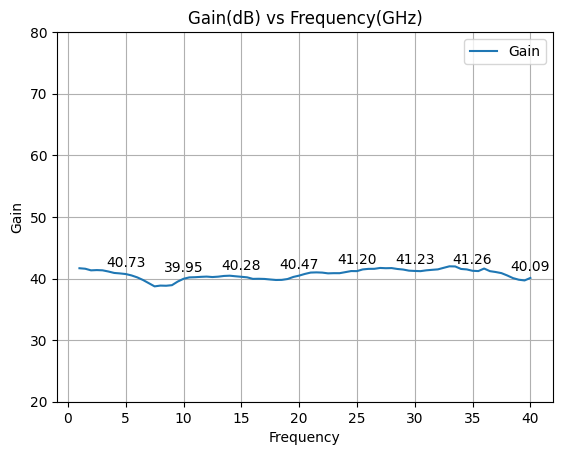

,Frequency,MMA030AA_gain,MMA030AA_gain_cascaded,MAAM011286_gain,MAAM011286_gain_cascaded,MAAM011109_gain,MAAM011109_gain_cascaded
0,1.0,12.253954,12.253954,15.843449,28.097404,13.571669,41.669073
1,1.5,12.086345,12.086345,15.864440,27.950785,13.638254,41.589039
2,2.0,11.969182,11.969182,15.869452,27.838634,13.488076,41.326711
3,2.5,11.854636,11.854636,15.934945,27.789581,13.580755,41.370336
4,3.0,11.738332,11.738332,15.948916,27.687248,13.644170,41.331418
...,...,...,...,...,...,...,...
74,38.0,11.325606,11.325606,18.101892,29.427498,11.069465,40.496963
75,38.5,11.273698,11.273698,18.070597,29.344296,10.721721,40.066017
76,39.0,11.195335,11.195335,18.071766,29.267100,10.538800,39.805900
77,39.5,11.253969,11.253969,18.025163,29.279131,10.410264,39.689395


In [ ]:
PA_Gain_calculator([MMA030AA_gain, MAAM011286_gain, MAAM011109_gain])